In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Análise de Dados do Titanic: Predição de Sobrevivência

Neste notebook, vamos realizar uma análise do dataset Titanic para prever a sobrevivência dos passageiros. Vamos seguir as etapas clássicas de um projeto de Data Science, que incluem limpeza dos dados, visualizações e a modelagem com algoritmos de Machine Learning.

## Objetivo
Responder a perguntas sobre a sobrevivência dos passageiros com base em fatores como classe, idade, sexo e outras variáveis. Além disso, aplicaremos dois algoritmos de Machine Learning para comparar suas performances.


In [3]:
# Carregar o dataset do Titanic
data = pd.read_csv('train.csv')

# Exibir as primeiras linhas do dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Etapa 1: Carregamento do Dataset e Análise Inicial

Carregamos o dataset fornecido, que contém informações sobre os passageiros do Titanic, e fazemos uma análise inicial das colunas e valores para identificar dados ausentes e o tipo de variáveis que iremos manipular.

In [4]:
# Verificar informações do dataset
data.info()

# Verificar dados ausentes
missing_data = data.isnull().sum()
missing_data[missing_data > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age         177
Cabin       687
Embarked      2
dtype: int64

### Etapa 2: Tratamento de Dados Ausentes

Identificamos que a coluna 'Age' possui valores ausentes, então vamos preencher esses dados com a mediana da idade. A coluna 'Cabin' será removida devido à grande quantidade de valores faltantes, e as demais linhas com dados ausentes serão descartadas.


In [5]:
# Preencher dados ausentes na coluna 'Age' com a mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

# Verifique se a coluna 'Cabin' existe antes de tentar removê-la
if 'Cabin' in data.columns:
    data.drop(columns=['Cabin'], inplace=True)

# Remover linhas com dados ausentes em outras colunas
data.dropna(inplace=True)

# Verificar novamente se há dados ausentes
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

Series([], dtype: int64)

### Etapa 3: Visualizações Exploratórias

Nesta seção, vamos criar gráficos que nos ajudem a entender melhor a relação entre as variáveis e a sobrevivência dos passageiros. Verificaremos a sobrevivência com base na classe, sexo e idade dos passageiros.


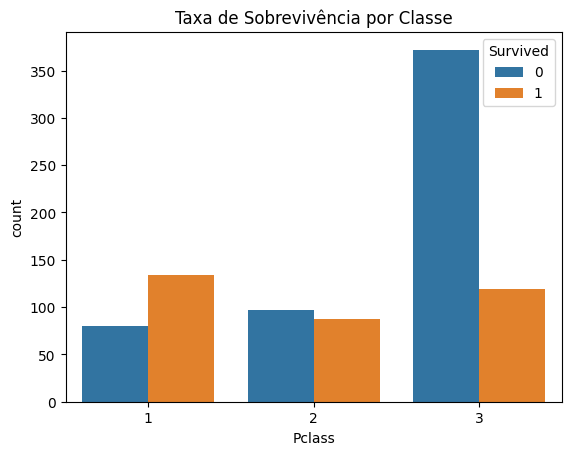

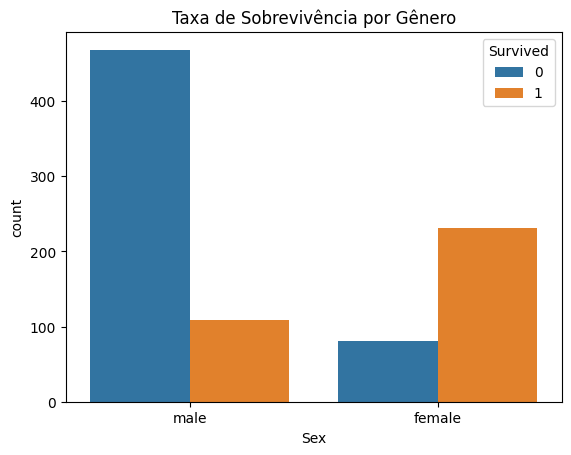

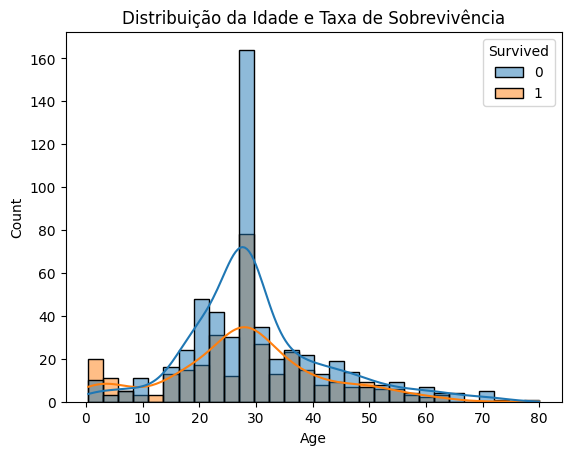

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar a taxa de sobrevivência por classe
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Taxa de Sobrevivência por Classe')
plt.show()

# Visualizar a taxa de sobrevivência por gênero
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Taxa de Sobrevivência por Gênero')
plt.show()

# Visualizar a distribuição de idade e a sobrevivência
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Distribuição da Idade e Taxa de Sobrevivência')
plt.show()


# Taxa de sobrevivência por porto de embarque
taxa_sobrevivencia_porto = data.groupby('Embarked')['Survived'].mean()
print(taxa_sobrevivencia_porto)

# Visualização
plt.figure(figsize=(8, 6))
sns.barplot(x=taxa_sobrevivencia_porto.index, y=taxa_sobrevivencia_porto.values, palette='coolwarm')
plt.title('Taxa de Sobrevivência por Porto de Embarque', fontsize=16)
plt.xlabel('Porto de Embarque', fontsize=12)
plt.ylabel('Taxa de Sobrevivência', fontsize=12)
plt.grid(True)
plt.show()


SibSp
0    0.343234
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


/var/folders/gx/nbzhk3x51cdd2zvs7zmj0q780000gn/T/ipykernel_12309/220644799.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_sobrevivencia_sibsp.index, y=taxa_sobrevivencia_sibsp.values, palette='Set2')


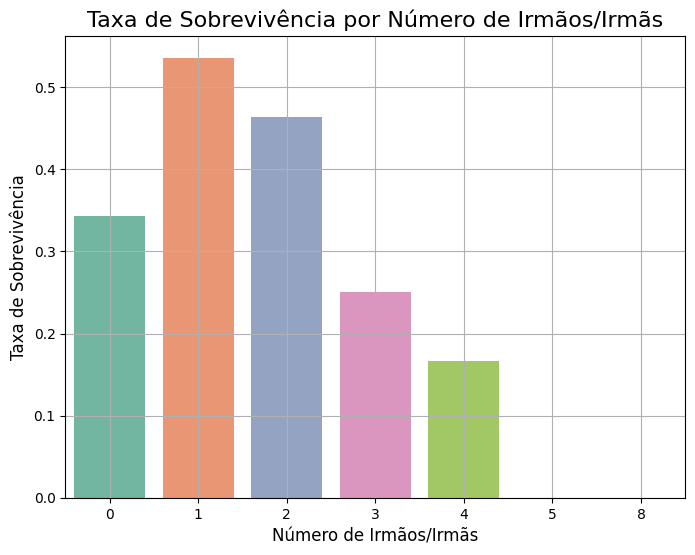

Parch
0    0.341716
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


/var/folders/gx/nbzhk3x51cdd2zvs7zmj0q780000gn/T/ipykernel_12309/220644799.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_sobrevivencia_parch.index, y=taxa_sobrevivencia_parch.values, palette='Set1')


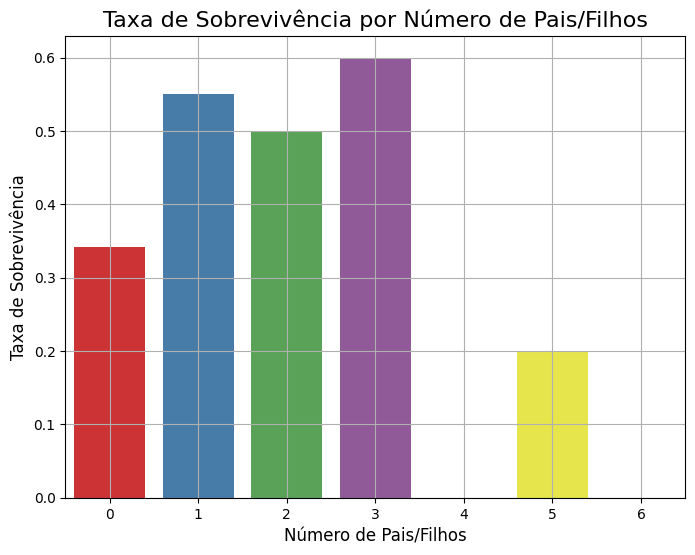

In [14]:
# Taxa de sobrevivência em relação ao número de irmãos/irmãs (SibSp)
taxa_sobrevivencia_sibsp = data.groupby('SibSp')['Survived'].mean()
print(taxa_sobrevivencia_sibsp)

# Visualização
plt.figure(figsize=(8, 6))
sns.barplot(x=taxa_sobrevivencia_sibsp.index, y=taxa_sobrevivencia_sibsp.values, palette='Set2')
plt.title('Taxa de Sobrevivência por Número de Irmãos/Irmãs', fontsize=16)
plt.xlabel('Número de Irmãos/Irmãs', fontsize=12)
plt.ylabel('Taxa de Sobrevivência', fontsize=12)
plt.grid(True)
plt.show()

# Taxa de sobrevivência em relação ao número de pais/filhos (Parch)
taxa_sobrevivencia_parch = data.groupby('Parch')['Survived'].mean()
print(taxa_sobrevivencia_parch)

# Visualização
plt.figure(figsize=(8, 6))
sns.barplot(x=taxa_sobrevivencia_parch.index, y=taxa_sobrevivencia_parch.values, palette='Set1')
plt.title('Taxa de Sobrevivência por Número de Pais/Filhos', fontsize=16)
plt.xlabel('Número de Pais/Filhos', fontsize=12)
plt.ylabel('Taxa de Sobrevivência', fontsize=12)
plt.grid(True)
plt.show()


Correlação entre Idade e Sobrevivência: -0.07


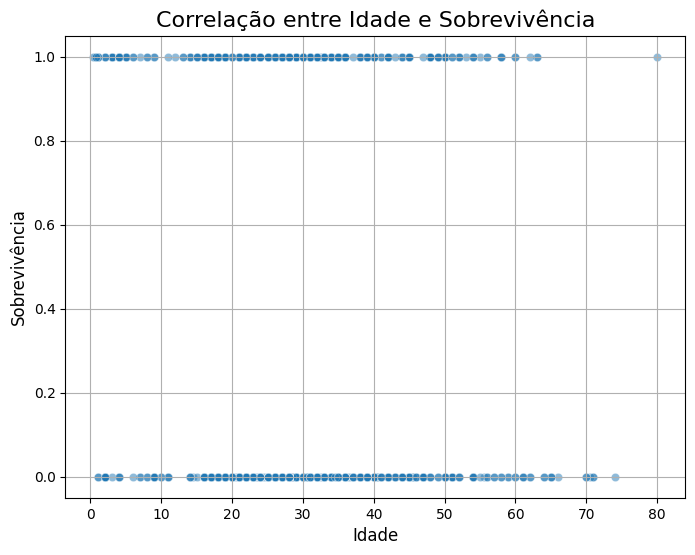

In [22]:
# Correlação entre idade e sobrevivência
correlacao_idade = data[['Age', 'Survived']].corr().iloc[0, 1]
print(f"Correlação entre Idade e Sobrevivência: {correlacao_idade:.2f}")

# Visualização
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Survived', data=data, alpha=0.5)
plt.title('Correlação entre Idade e Sobrevivência', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Sobrevivência', fontsize=12)
plt.grid(True)
plt.show()


### Etapa 4: Preparação dos Dados para Machine Learning

Antes de treinar os modelos de Machine Learning, é necessário transformar variáveis categóricas em numéricas. Nesta etapa, convertendo as colunas 'Sex' e 'Embarked' em valores numéricos, e definimos as características (X) e o rótulo (y) que será previsto.


In [38]:
from sklearn.model_selection import train_test_split

# Converter variáveis categóricas em numéricas
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Definir as características (X) e o rótulo (y)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Dividir os dados em conjuntos de treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Etapa 5: Modelagem com Machine Learning

Vamos treinar dois modelos de Machine Learning para prever a sobrevivência dos passageiros: **Regressão Logística** e **K-Nearest Neighbors (KNN)**. Depois de ajustar os modelos com os dados de treinamento, faremos previsões no conjunto de teste e compararemos os resultados.


In [39]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']


In [40]:
# Importar bibliotecas necessárias para modelagem
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Criar e ajustar o modelo de Regressão Logística
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# 2. Fazer previsões com o modelo de Regressão Logística
log_predictions = log_model.predict(X_test)

# 3. Avaliação do modelo de Regressão Logística
print("Regressão Logística - Acurácia:", accuracy_score(y_test, log_predictions))
print("Matriz de Confusão:\n", confusion_matrix(y_test, log_predictions))
print("Relatório de Classificação:\n", classification_report(y_test, log_predictions))

# 4. Criar e ajustar o modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 5. Fazer previsões com o modelo KNN
knn_predictions = knn_model.predict(X_test)

# 6. Avaliação do modelo KNN
print("KNN - Acurácia:", accuracy_score(y_test, knn_predictions))
print("Matriz de Confusão:\n", confusion_matrix(y_test, knn_predictions))
print("Relatório de Classificação:\n", classification_report(y_test, knn_predictions))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Avaliação de Modelos de Machine Learning

Nesta seção, vamos avaliar os dois modelos de Machine Learning que criamos anteriormente: Regressão Logística e KNN. Vamos usar métricas como acurácia, matriz de confusão e o relatório de classificação para determinar a performance de cada modelo.

### Importar Bibliotecas para Avaliação

Importamos as bibliotecas necessárias para calcular a acurácia, gerar a matriz de confusão e criar um relatório detalhado de classificação dos dois modelos.


In [10]:
# Importar bibliotecas necessárias para avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Avaliação do modelo de Regressão Logística
print("Avaliação do Modelo de Regressão Logística:")
log_accuracy = accuracy_score(y_test, log_predictions)
log_confusion = confusion_matrix(y_test, log_predictions)
log_report = classification_report(y_test, log_predictions)

print("Acurácia:", log_accuracy)
print("Matriz de Confusão:\n", log_confusion)
print("Relatório de Classificação:\n", log_report)

# Avaliação do modelo KNN
print("Avaliação do Modelo KNN:")
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_confusion = confusion_matrix(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)

print("Acurácia:", knn_accuracy)
print("Matriz de Confusão:\n", knn_confusion)
print("Relatório de Classificação:\n", knn_report)


Avaliação do Modelo de Regressão Logística:
Acurácia: 0.7902621722846442
Matriz de Confusão:
 [[136  31]
 [ 25  75]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       167
           1       0.71      0.75      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267

Avaliação do Modelo KNN:
Acurácia: 0.6816479400749064
Matriz de Confusão:
 [[131  36]
 [ 49  51]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76       167
           1       0.59      0.51      0.55       100

    accuracy                           0.68       267
   macro avg       0.66      0.65      0.65       267
weighted avg       0.67      0.68      0.68       267



### Distribuição da Idade dos Passageiros

Neste gráfico, estamos visualizando a distribuição da idade dos passageiros no dataset do Titanic. Através de um histograma com 30 bins (intervalos), podemos identificar as faixas etárias mais comuns entre os passageiros. Além disso, adicionamos uma curva de densidade para melhor visualizar a distribuição. Essa análise é útil para entender a variação etária dos passageiros e se pode haver uma relação entre a idade e a taxa de sobrevivência.

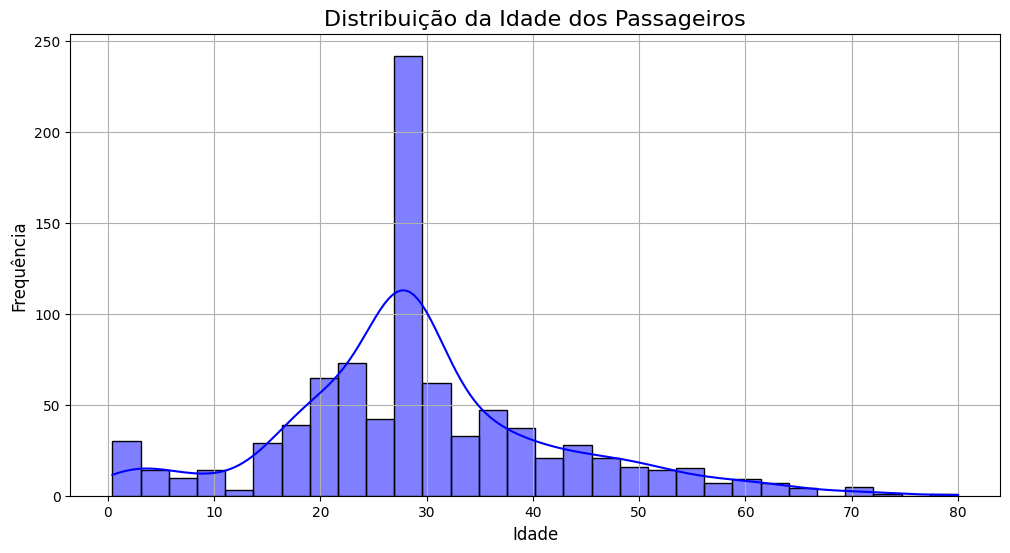

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True, color='blue')
plt.title('Distribuição da Idade dos Passageiros', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()


### Taxa de Sobrevivência por Classe

O gráfico a seguir mostra a distribuição dos passageiros por classe (1ª, 2ª e 3ª) e sua taxa de sobrevivência. Estamos utilizando um gráfico de barras para contar o número de passageiros em cada classe, diferenciando entre aqueles que sobreviveram e os que não sobreviveram. A classe social dos passageiros pode ter influenciado a sua chance de sobrevivência no naufrágio do Titanic, e este gráfico nos ajuda a identificar possíveis tendências e padrões entre a classe e a sobrevivência.

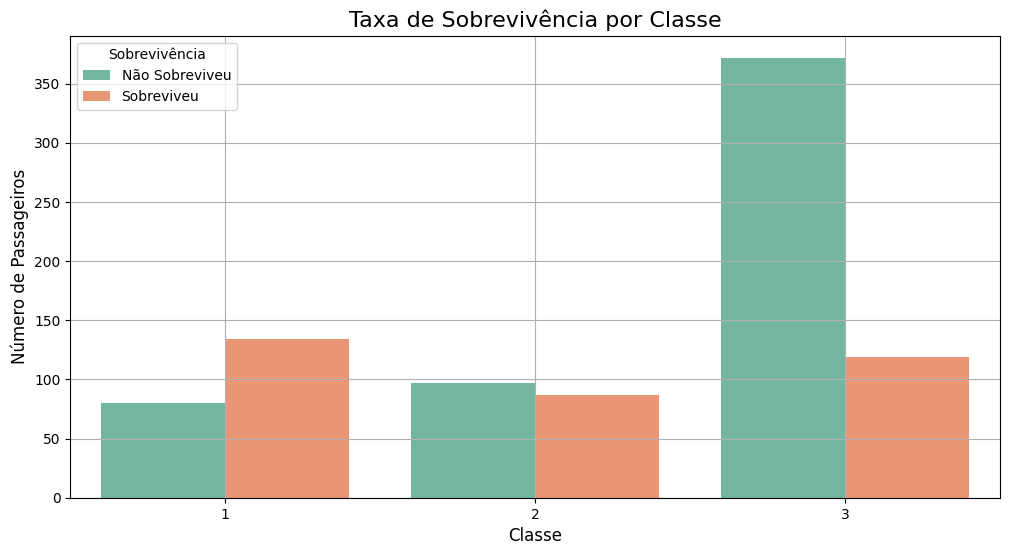

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Pclass', hue='Survived', palette='Set2')
plt.title('Taxa de Sobrevivência por Classe', fontsize=16)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)
plt.legend(title='Sobrevivência', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.grid(True)
plt.show()


### Distribuição da Idade por Gênero e Sobrevivência

Este gráfico de violino ilustra a distribuição das idades dos passageiros do Titanic, categorizada por gênero e taxa de sobrevivência. O gráfico permite uma visualização clara da densidade das idades para homens e mulheres, dividindo as informações com base em se os passageiros sobreviveram ou não.

- **Eixo X (Gênero)**: Representa os gêneros dos passageiros, com categorias 0 = 'Masculino' e 1 = 'Feminino'.
- **Eixo Y (Idade)**: Indica a idade dos passageiros.
- **Hue (Sobrevivência)**: Através da cor, é possível distinguir entre os que sobreviveram (por exemplo, representados em uma cor) e os que não sobreviveram (outra cor).


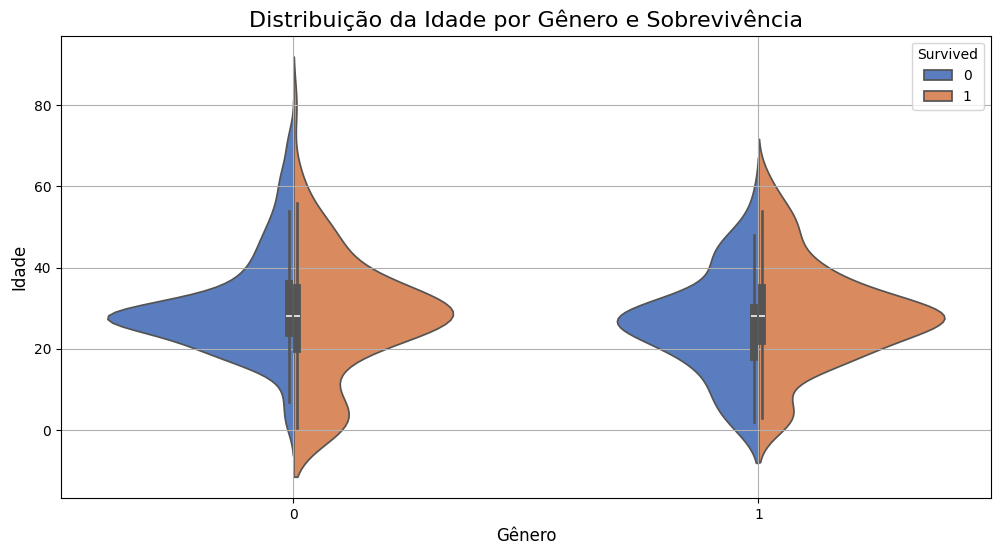

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Sex', y='Age', hue='Survived', split=True, palette='muted')
plt.title('Distribuição da Idade por Gênero e Sobrevivência', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Idade', fontsize=12)
plt.grid(True)
plt.show()
